## 1. 데이터 로드

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [2]:
# 데이터 로드
train = pd.read_csv('C:/Users/subin/github/Little-Sonny/data/train.csv')
test = pd.read_csv('C:/Users/subin/github/Little-Sonny/data/test.csv')
submission = pd.read_csv('C:/Users/subin/github/Little-Sonny/data/sample_submission.csv')

print(f'Train 데이터 크기: {train.shape}')
print(f'Test 데이터 크기: {test.shape}')
print(f'Submission 데이터 크기: {submission.shape}')

Train 데이터 크기: (3019, 66)
Test 데이터 크기: (1626, 65)
Submission 데이터 크기: (1626, 2)


## 2. 데이터 확인

#### 1. 기본 인적 사항 (Basic Profile)

* **ID**: 선수 고유 식별 번호
* **Age**: 나이 (유망주 판단의 결정적 요소)
* **Height / Weight**: 키(cm) 및 몸무게(kg)
* **Position**: 주 포지션
* **PreferredFoot**: 주발 (Left / Right)
* **Attacking / Defensive WorkRate**: 공격 및 수비 참여도 (High/Medium/Low)

#### 2. 6대 핵심 요약 스탯 (Main Totals)

* **PaceTotal / ShootingTotal / PassingTotal**: 속도, 슈팅, 패스 능력 합계
* **DribblingTotal / DefendingTotal / PhysicalityTotal**: 드리블, 수비, 피지컬 능력 합계

#### 3. 세부 기술 스탯 (Technical Skills)

* **공격 기술**: `Crossing`(크로스), `Finishing`(결정력), `HeadingAccuracy`(헤더), `Volleys`(발리슛), `Curve`(커브), `FKAccuracy`(프리킥), `LongShots`(중거리슛), `Penalties`(PK)
* **패스/컨트롤**: `ShortPassing`(짧은패스), `LongPassing`(긴패스), `BallControl`(볼컨트롤), `Vision`(시야)
* **수비 기술**: `Marking`(대인방어), `StandingTackle`(태클), `SlidingTackle`(슬라이딩 태클), `Interceptions`(가로채기)

#### 4. 신체 및 심리 스탯 (Physical & Mental)

* **운동 능력**: `Acceleration`(가속력), `SprintSpeed`(주력), `Agility`(민첩성), `Reactions`(반응속도), `Balance`(밸런스), `ShotPower`(슛파워), `Jumping`(점프력), `Stamina`(체력), `Strength`(힘)
* **심리/태도**: `Aggression`(적극성), `Positioning`(위치선정), `Composure`(침착함)

#### 5. 골키퍼 전용 스탯 (GK Special)

* **GK 스탯 5종**: `GKDiving`, `GKHandling`, `GKKicking`, `GKPositioning`, `GKReflexes`

#### 6. 포지션별 숙련도 레이팅 (Detailed Ratings)

* **공격**: `STRating`, `LW/RW/LF/RF/CF Rating`
* **미드필더**: `CAM/LM/CM/RM/CDM Rating`
* **수비**: `LWB/RWB/LB/RB/CB Rating`
* **골키퍼**: `GKRating`

#### 7. 타겟 변수 (The Goal)

* **Prospect**: **유망주 여부 (0: 일반, 1: 유망주)**

In [3]:
import pandas as pd

# 2. 구분용 컬럼 생성 (나중에 분리하기 위함)
train['is_train'] = True
test['is_train'] = False

# 3. 데이터 합치기 (행 방향으로 연결)
# 테스트 데이터에는 타겟(정답) 컬럼이 없을 수 있으므로, 
# 합치면 테스트 데이터 쪽 타겟 컬럼은 자동으로 NaN(결측치) 처리가 됩니다.
base_data = pd.concat([train, test], axis=0).reset_index(drop=True)

print(f"Base Data Shape: {base_data.shape}")

Base Data Shape: (4645, 67)


In [4]:
base_data.head()

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect,is_train
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0.0,True
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0.0,True
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0.0,True
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0.0,True
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0.0,True


--- 📊 little sonny 팀의 나이대별 유망주 비율 분석 ---
     Total  Prospects  Prospect_Rate (%)
Age                                     
16      31         18              58.06
17     249        151              60.64
18     626        319              50.96
19    1039        339              32.63
20    1260        206              16.35
21    1440         57               3.96
--------------------------------------------------


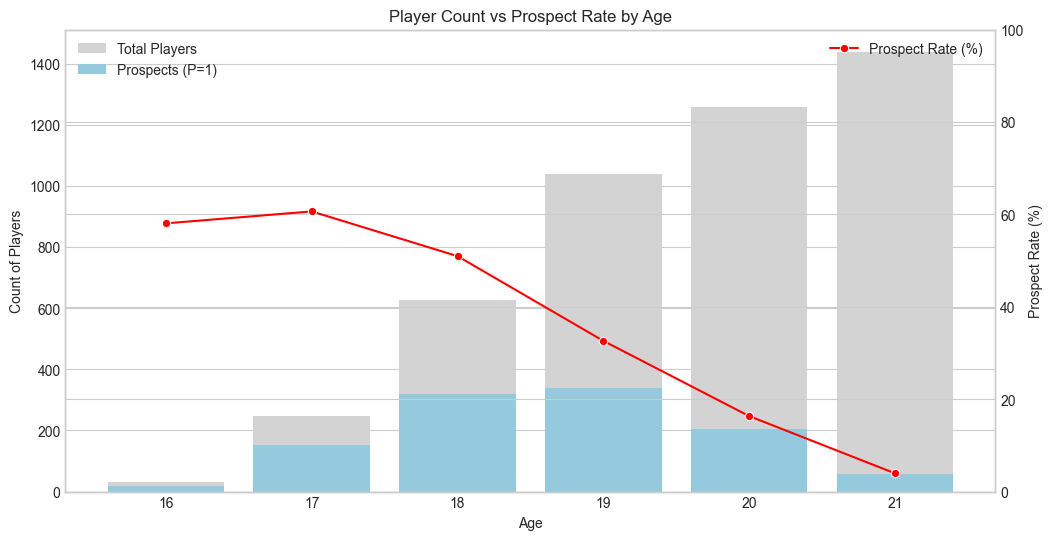

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 나이대별 전체 인원과 유망주 인원 계산
age_total = base_data['Age'].value_counts().sort_index()
age_prospects = base_data[base_data['Prospect'] == 1]['Age'].value_counts().sort_index()

# 2. 데이터프레임으로 합치기
age_analysis = pd.DataFrame({
    'Total': age_total,
    'Prospects': age_prospects
})

# 3. 유망주 비율(%) 계산
age_analysis['Prospect_Rate (%)'] = (age_analysis['Prospects'] / age_analysis['Total'] * 100).round(2)

print("--- 📊 little sonny 팀의 나이대별 유망주 비율 분석 ---")
print(age_analysis)
print("-" * 50)

# 4. 시각화 (복합 그래프: 인원수는 막대, 비율은 선 그래프)
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프: 전체 인원 vs 유망주 인원
sns.barplot(x=age_analysis.index, y=age_analysis['Total'], color='lightgrey', label='Total Players', ax=ax1)
sns.barplot(x=age_analysis.index, y=age_analysis['Prospects'], color='skyblue', label='Prospects (P=1)', ax=ax1)
ax1.set_ylabel('Count of Players')
ax1.legend(loc='upper left')

# 선 그래프: 유망주 비율 (이중축 사용)
ax2 = ax1.twinx()
sns.lineplot(x=range(len(age_analysis)), y=age_analysis['Prospect_Rate (%)'], color='red', marker='o', label='Prospect Rate (%)', ax=ax2)
ax2.set_ylabel('Prospect Rate (%)')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')

plt.title('Player Count vs Prospect Rate by Age')
plt.show()

In [ ]:
# 1. 라이브러리 임포트 (필수)
from lightautoml.tasks import Task
from lightautoml.automl.presets.tabular_presets import TabularAutoML

# 2. 타겟 컬럼 지정
TARGET_NAME = 'Prospect'

# 3. roles 정의 (어떤 변수가 무엇인지 알려주는 설정)
# target: 우리가 맞춰야 할 정답지
# drop: 학습에 쓰면 안 되는 고유 ID나 불필요한 값
roles = {
    'target': TARGET_NAME,
    'drop': ['ID'] 
}

# 4. 태스크 및 AutoML 설정
task = Task('reg')
automl = TabularAutoML(
    task = task, 
    timeout = 3600,
    cpu_limit = 9,
      general_params = {
        'use_algos': [['lgb', 'cb']], # 사용할 알고리즘
        'weighted_ensemble_params': {
            'weights': [0.20, 0.80]  # [lgb 비중, cb 비중]
        }
    },
    reader_params = {'n_jobs': 9, 'cv': 5, 'random_state': 42}
)
# 5. 학습 실행 (이제 roles가 정의되었으므로 에러가 나지 않습니다)
oof_pred = automl.fit_predict(train, roles = roles, verbose = 1)

[13:22:15] Stdout logging level is INFO.
[13:22:15] Task: reg

[13:22:15] Start automl preset with listed constraints:
[13:22:15] - time: 3600.00 seconds
[13:22:15] - CPU: 9 cores
[13:22:15] - memory: 16 GB

[13:22:15] Train data shape: (3019, 67)

[13:22:25] Layer 1 train process start. Time left 3589.66 secs
[13:22:26] Selector_LightGBM fitting and predicting completed
[13:22:26] Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...
[13:22:27] Fitting Lvl_0_Pipe_0_Mod_0_LightGBM finished. score = -0.14867019653320312
[13:22:27] Lvl_0_Pipe_0_Mod_0_LightGBM fitting and predicting completed
[13:22:27] Start fitting Lvl_0_Pipe_0_Mod_1_CatBoost ...
[13:22:30] Fitting Lvl_0_Pipe_0_Mod_1_CatBoost finished. score = -0.1465602070093155
[13:22:30] Lvl_0_Pipe_0_Mod_1_CatBoost fitting and predicting completed
[13:22:30] Time left 3584.59 secs

[13:22:30] Layer 1 training completed.

[13:22:30] Blending: optimization starts with equal weights. Score = -0.1466855
[13:22:30] Blending: iteration 0: score = 

In [32]:
from sklearn.metrics import f1_score, roc_auc_score

# 예측값은 확률로 나오므로, 실제 클래스(0, 1)와 비교하기 위해 변환이 필요합니다.
# oof_pred.data[:, 0]는 모델이 예측한 '유망주일 확률'입니다.
oof_labels = (oof_pred.data[:, 0] > 0.3434).astype(int) 

print(f"ROC-AUC Score: {roc_auc_score(train[TARGET_NAME], oof_pred.data[:, 0]):.4f}")
print(f"F1 Score: {f1_score(train[TARGET_NAME], oof_labels, average='macro'):.4f}")

ROC-AUC Score: 0.8555
F1 Score: 0.7683


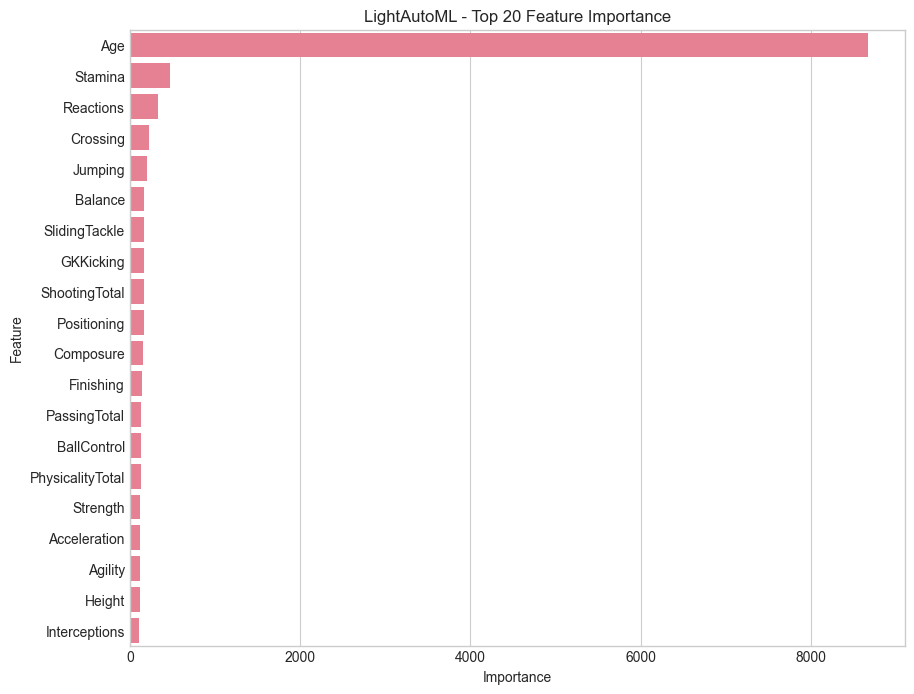

In [33]:
# 변수 중요도 계산 (Fast mode)
fast_fi = automl.get_feature_scores('fast')

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=fast_fi.head(20))
plt.title('LightAutoML - Top 20 Feature Importance')
plt.show()

In [34]:
# 가장 높은 F1 점수를 만드는 '최적의 임계값' 찾기
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(train[TARGET_NAME], (oof_pred.data[:, 0] > t).astype(int), average='macro') for t in thresholds]

best_t = thresholds[np.argmax(f1_scores)]
print(f"최적의 임계값: {best_t:.4f}")
print(f"최고 F1 점수: {max(f1_scores):.4f}")

최적의 임계값: 0.3434
최고 F1 점수: 0.7683
